In [ ]:
!pip install ultralytics

In [ ]:
from ultralytics import YOLO

# **Custom Data Training**

In [ ]:
!yolo task=detect mode=train model=yolov8l.pt conf=0.25 source="C:\Users\Atamert\Downloads\ANIMAL Detection.v3i.yolov8/data.yaml" epochs=50 imgsz=640

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import time
import torch
import cvzone

capture = cv.VideoCapture("animals.mp4")
#capture.set(3,640)
#capture.set(4,320)

print("Number of GPU: ", torch.cuda.device_count())
print("GPU Name: ", torch.cuda.get_device_name())


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

model1 = YOLO("runs/detect/train/weights/best.pt")


prev_time = 0
while True:
    isTrue, frame = capture.read()
    frame = cv.resize(frame, (640, 480))
    results = model1(frame,stream=True, verbose=False)
    names = model1.names
    for r in results:
        boxes = r.boxes
        for box in boxes:
            x1,y1,x2,y2 = box.xyxy[0]
            x1,y1,x2,y2 = int(x1), int(y1), int(x2), int(y2)

            #print(x1,y1,x2,y2)
            cv.rectangle(frame,(x1,y1),(x2,y2),(255,0,255),1)
            conf = round(float(box.conf[0]),2)
            #print(conf)
            className = names[int(box.cls)]
            cvzone.putTextRect(frame,f'{className} {conf}',
                         (max(0,x1), max(35,y1)), scale=0.5, thickness=1, offset=4)

    curr_time = time.time()
    fps = 1 / (curr_time - prev_time) if prev_time else 0
    prev_time = curr_time
    cv.putText(frame, f'FPS: {int(fps)}', (20, 40),
               cv.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    if cv.waitKey(1) & 0xFF == ord("q"):
        break

    cv.imshow("Video", frame)
capture.release()
cv.destroyAllWindows()

Eğitim ve Doğrulama Metrikleri Grafiği:


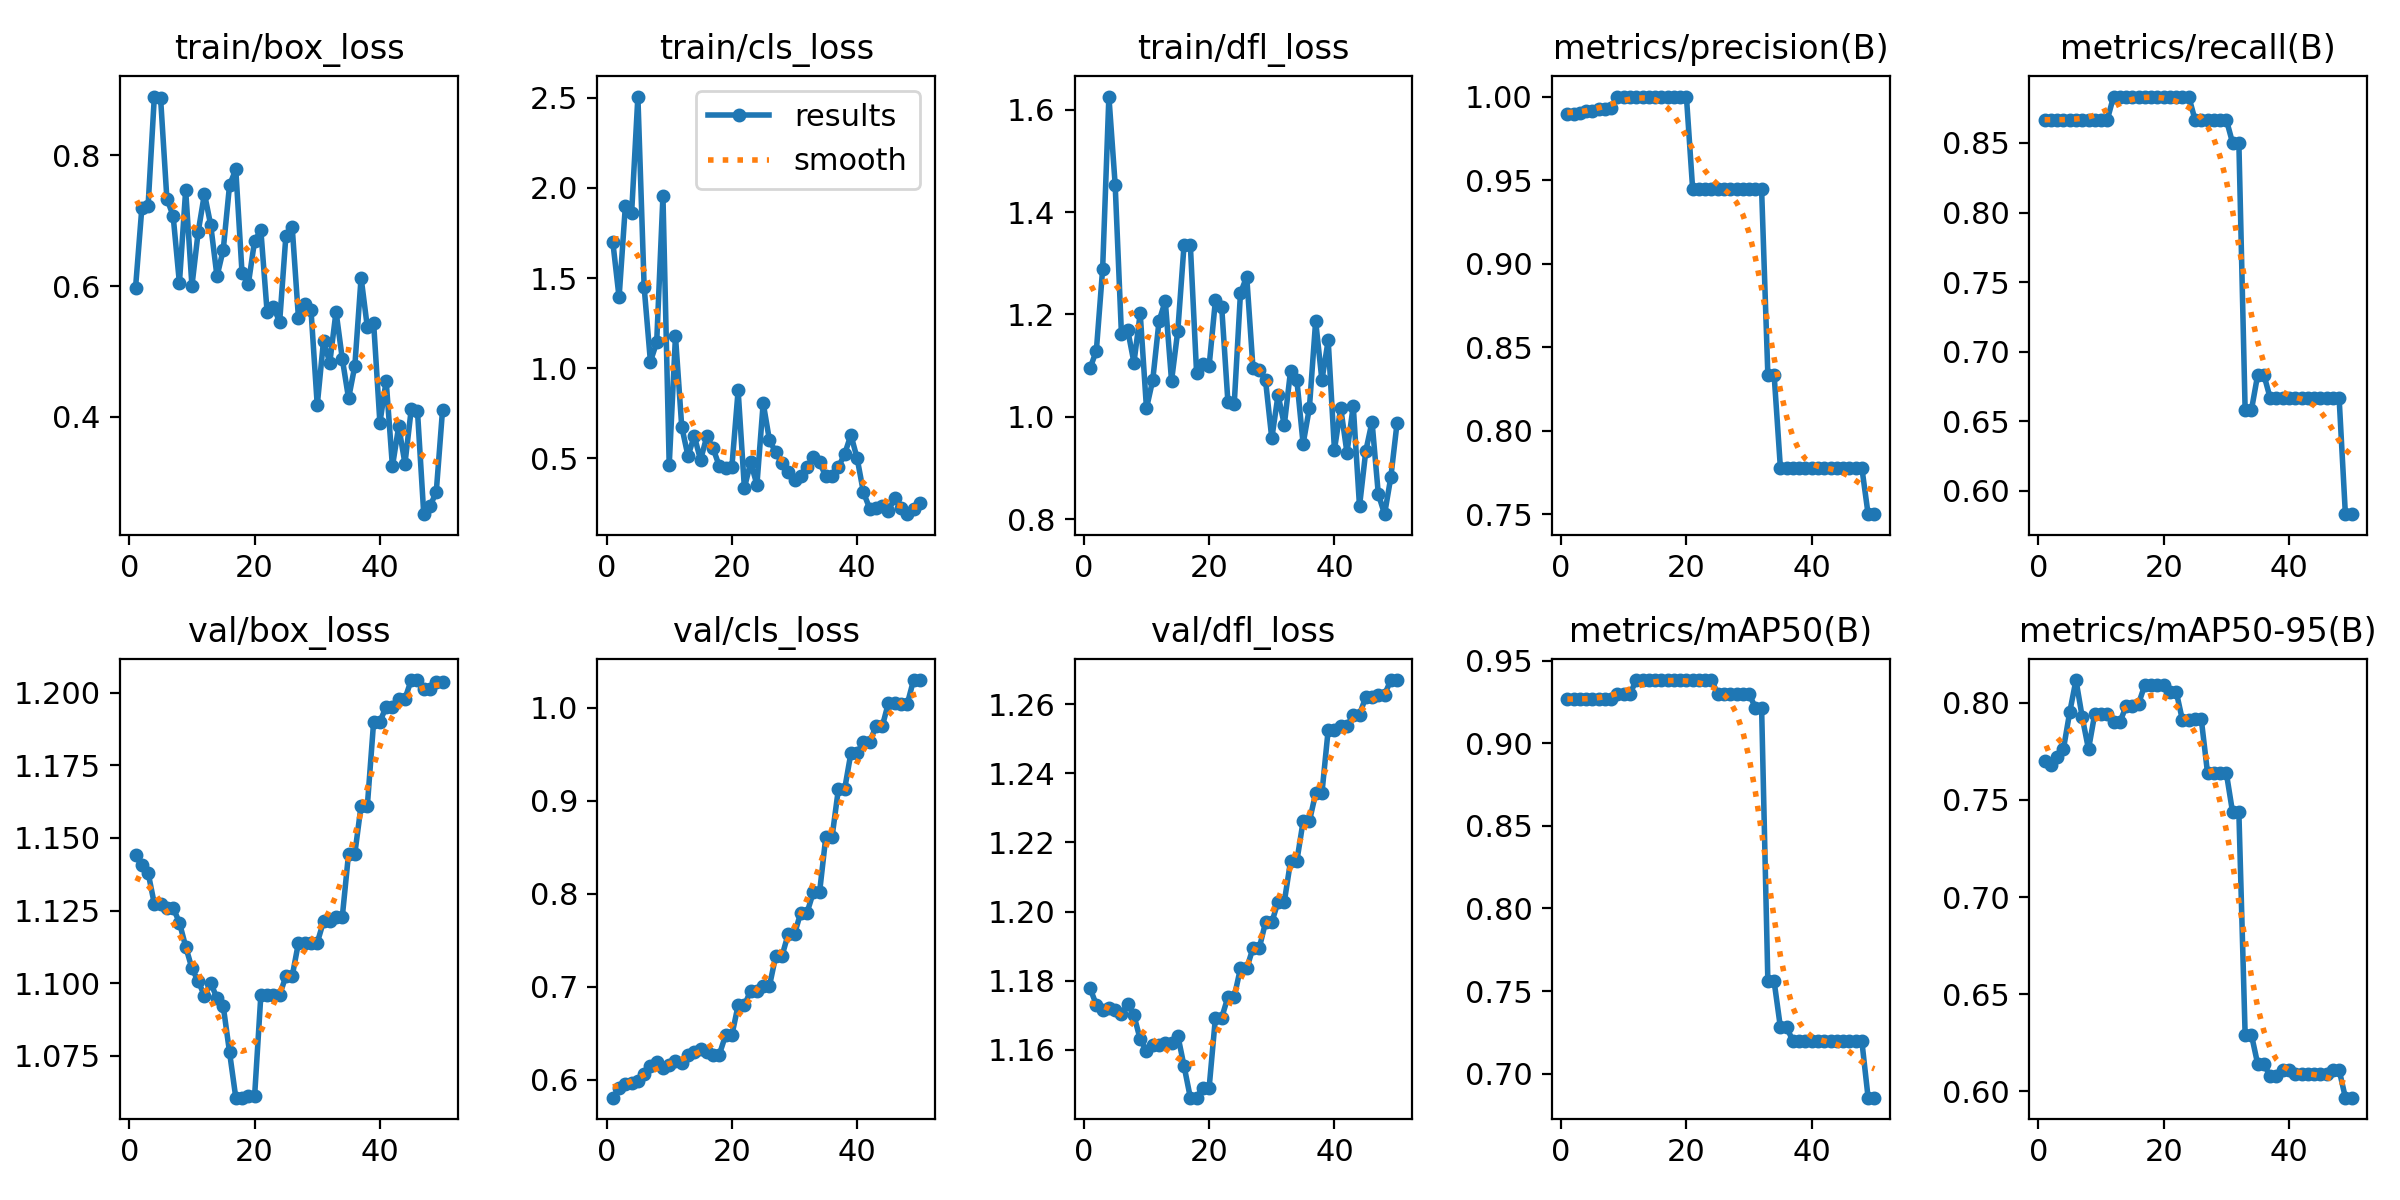

Confusion Matrix:


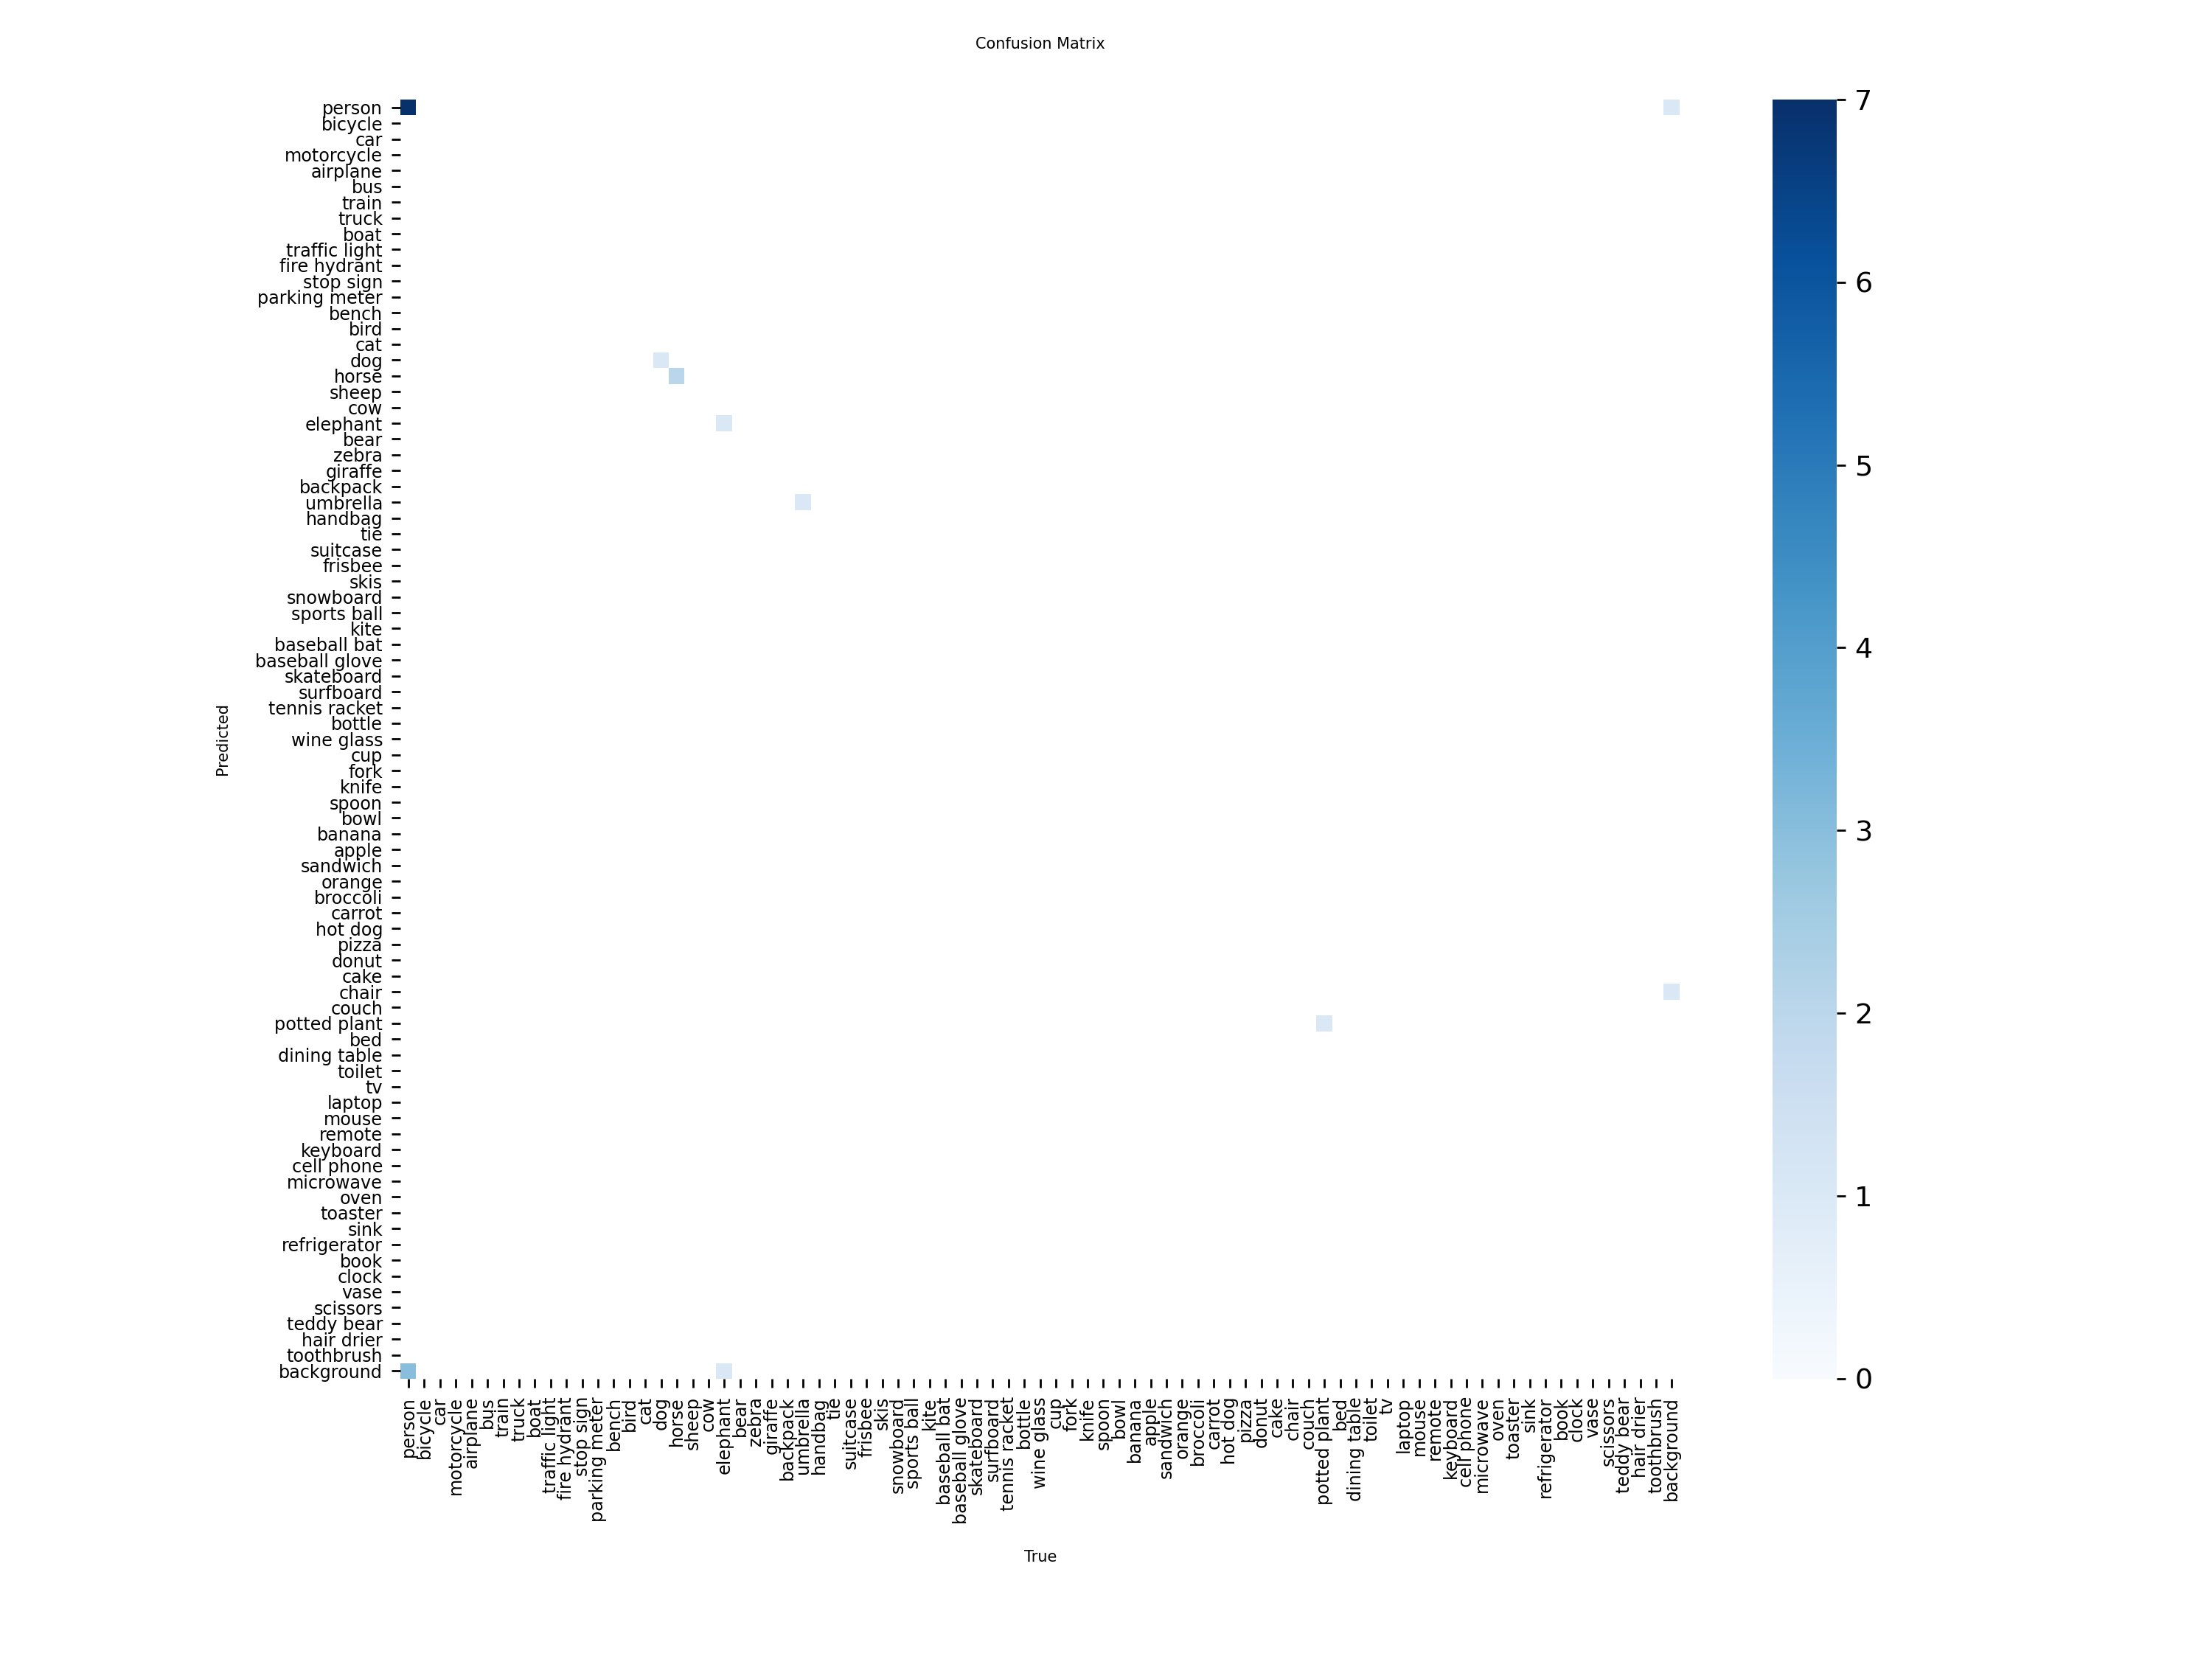

Precision-Recall Eğrisi:


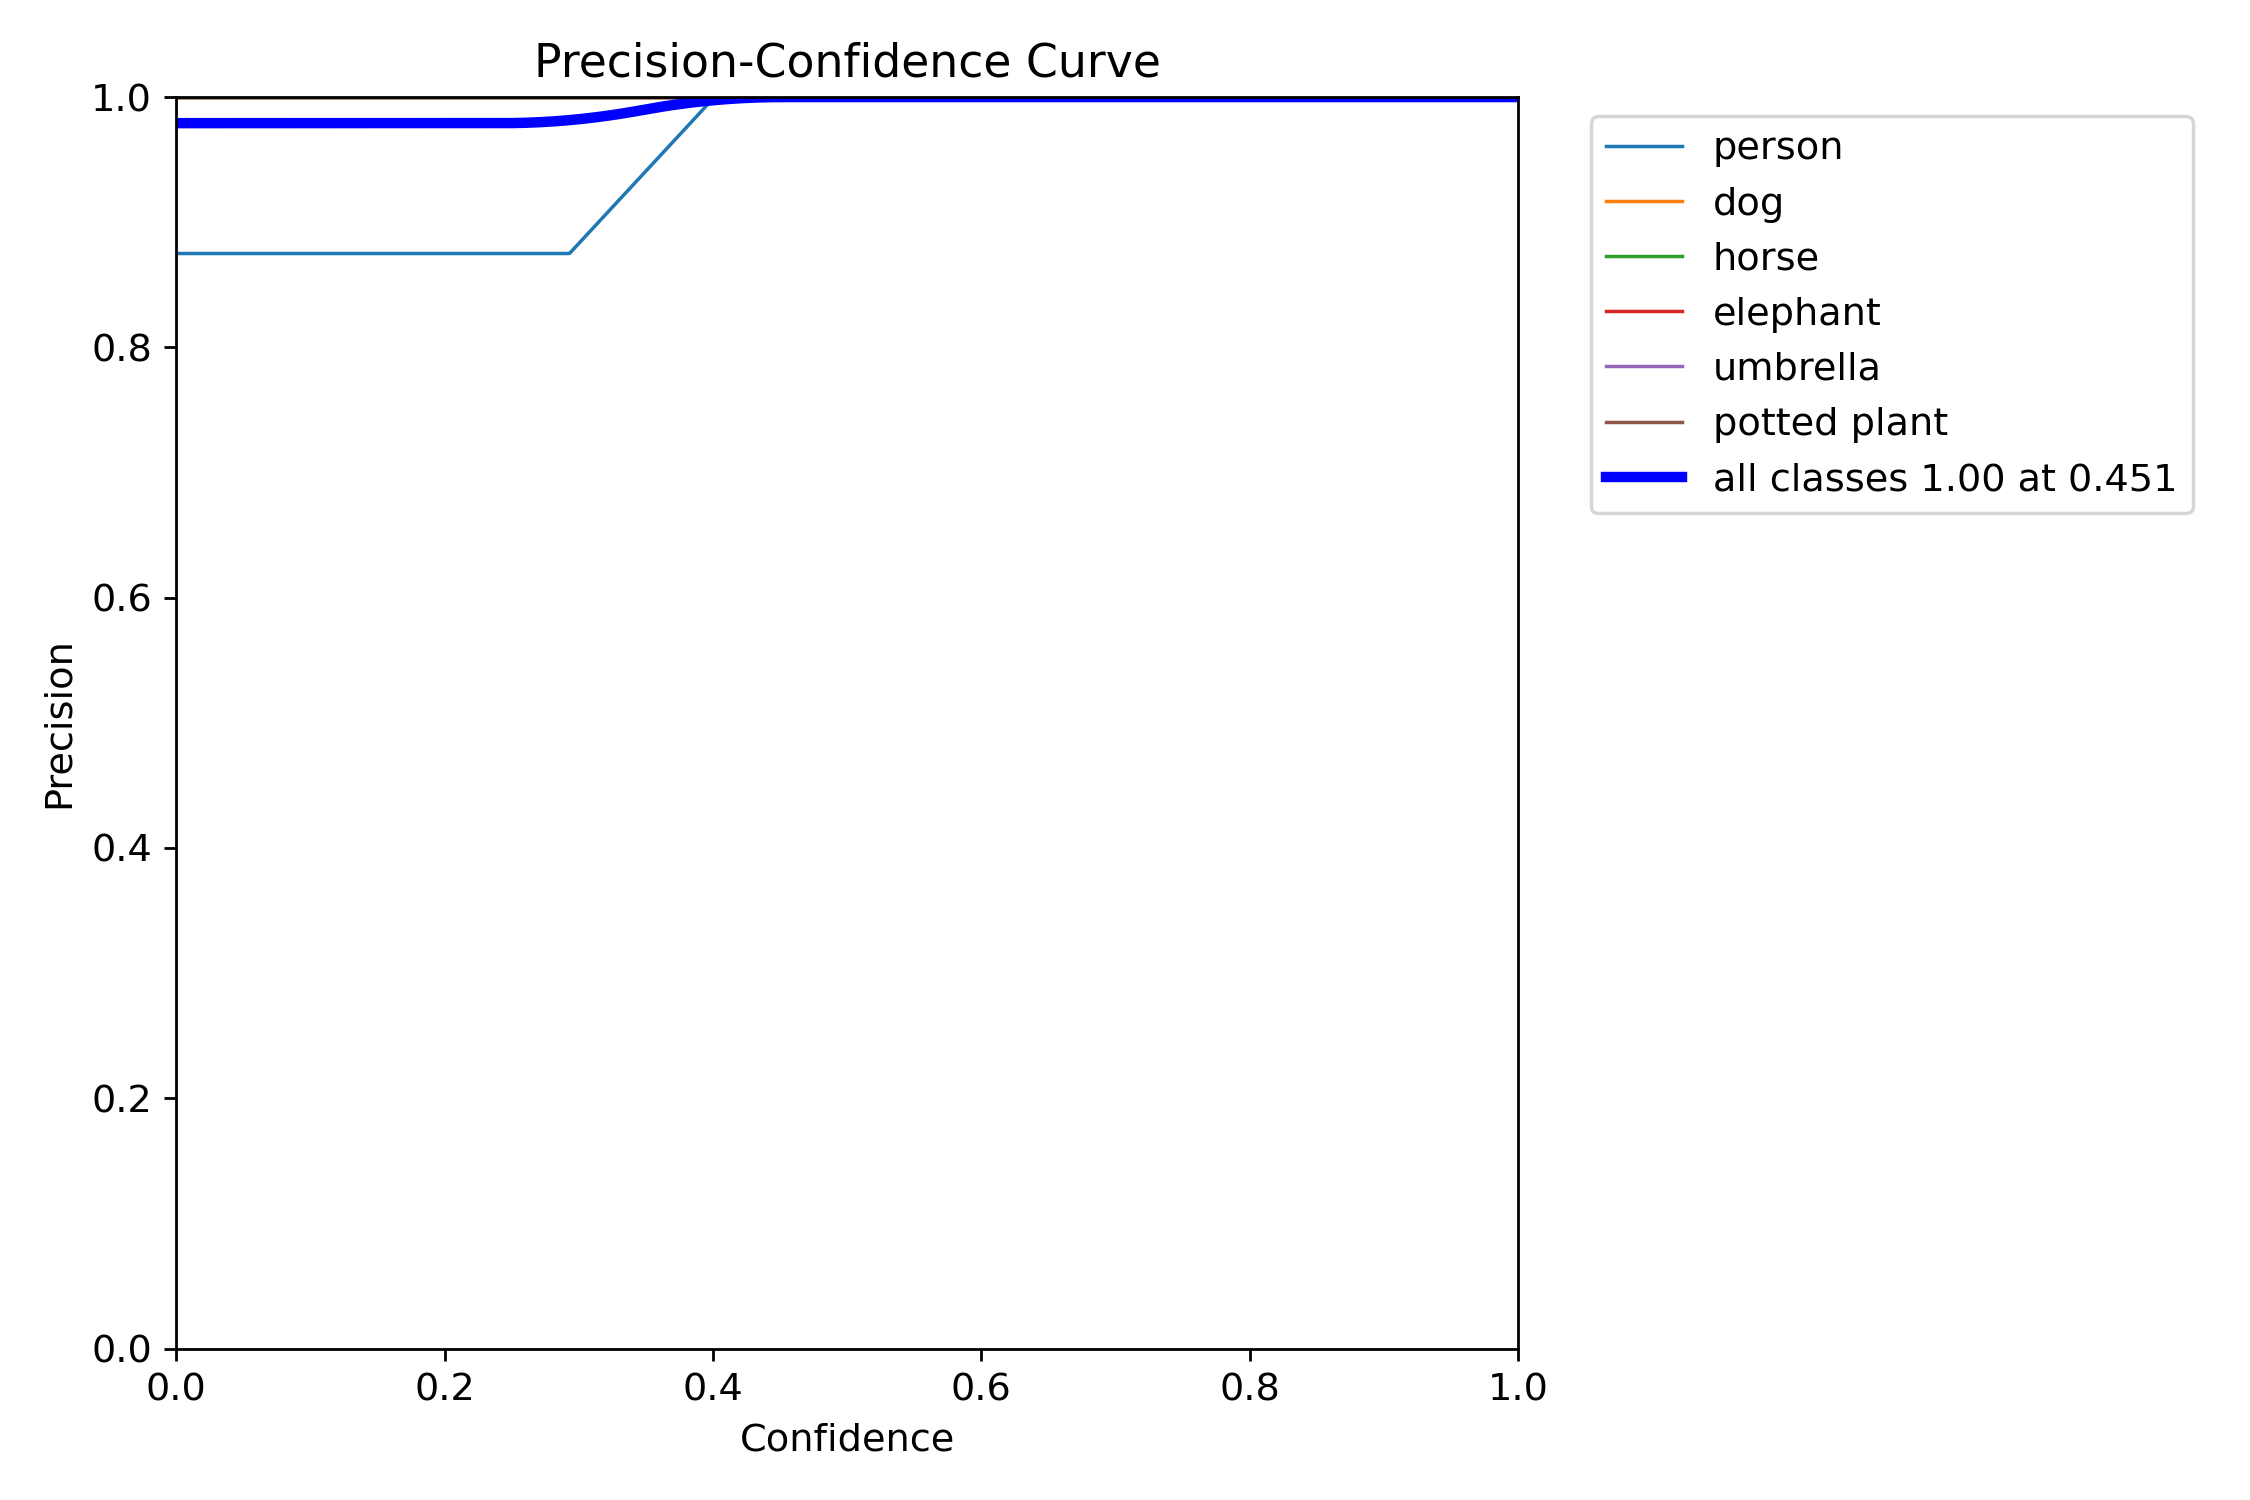

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Image, display

results_path = 'runs/detect/train/'

print("Eğitim ve Doğrulama Metrikleri Grafiği:")
display(Image(filename=results_path + 'results.png'))

print("Confusion Matrix:")
display(Image(filename=results_path + 'confusion_matrix.png'))

print("Precision-Recall Eğrisi:")
display(Image(filename=results_path + 'BoxP_curve.png'))

Loss ve Validation Loss grafiği


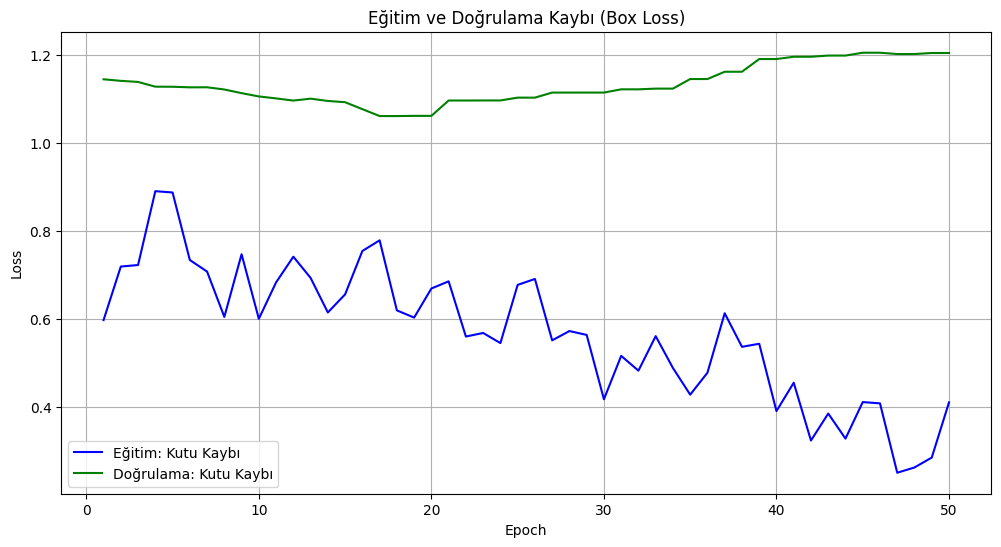

mAP grafiği


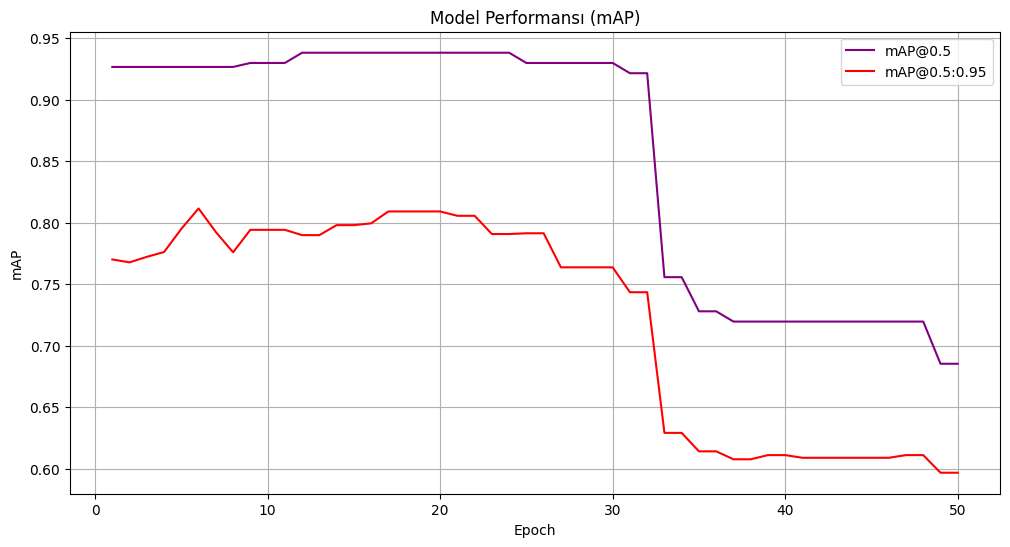

In [37]:
import pandas as pd
df = pd.read_csv(results_path + 'results.csv')


print("Loss ve Validation Loss grafiği")
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['train/box_loss'], label='Eğitim: Kutu Kaybı', color='blue')
plt.plot(df['epoch'], df['val/box_loss'], label='Doğrulama: Kutu Kaybı', color='green')
plt.title('Eğitim ve Doğrulama Kaybı (Box Loss)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

print("mAP grafiği")
plt.figure(figsize=(12, 6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP@0.5', color='purple')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP@0.5:0.95', color='red')
plt.title('Model Performansı (mAP)')
plt.xlabel('Epoch')
plt.ylabel('mAP')
plt.legend()
plt.grid(True)
plt.show()


image 1/1 c:\Users\Atamert\Desktop\train\ANIMAL Detection.v3i.yolov8\valid\images\OIP-5KXJ70e6l9qwDzE2pSgc9AHaE6_jpeg_jpg.rf.69dca7a6e8b8a3f6db76a29b3ad480b9.jpg: 640x640 1 cow, 8.8ms
Speed: 1.5ms preprocess, 8.8ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\Atamert\Desktop\train\ANIMAL Detection.v3i.yolov8\valid\images\37_jpg.rf.04f6391adadf82f783736e9b5bcb1fd2.jpg: 640x640 1 cat, 9.3ms
Speed: 1.5ms preprocess, 9.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 c:\Users\Atamert\Desktop\train\ANIMAL Detection.v3i.yolov8\valid\images\stock-photo-black-headed-weaver-nesting-close-top-2010152909_jpg.rf.7f029d842d7d80a80c5364b224b6a9a4.jpg: 640x640 1 bird, 9.2ms
Speed: 1.4ms preprocess, 9.2ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


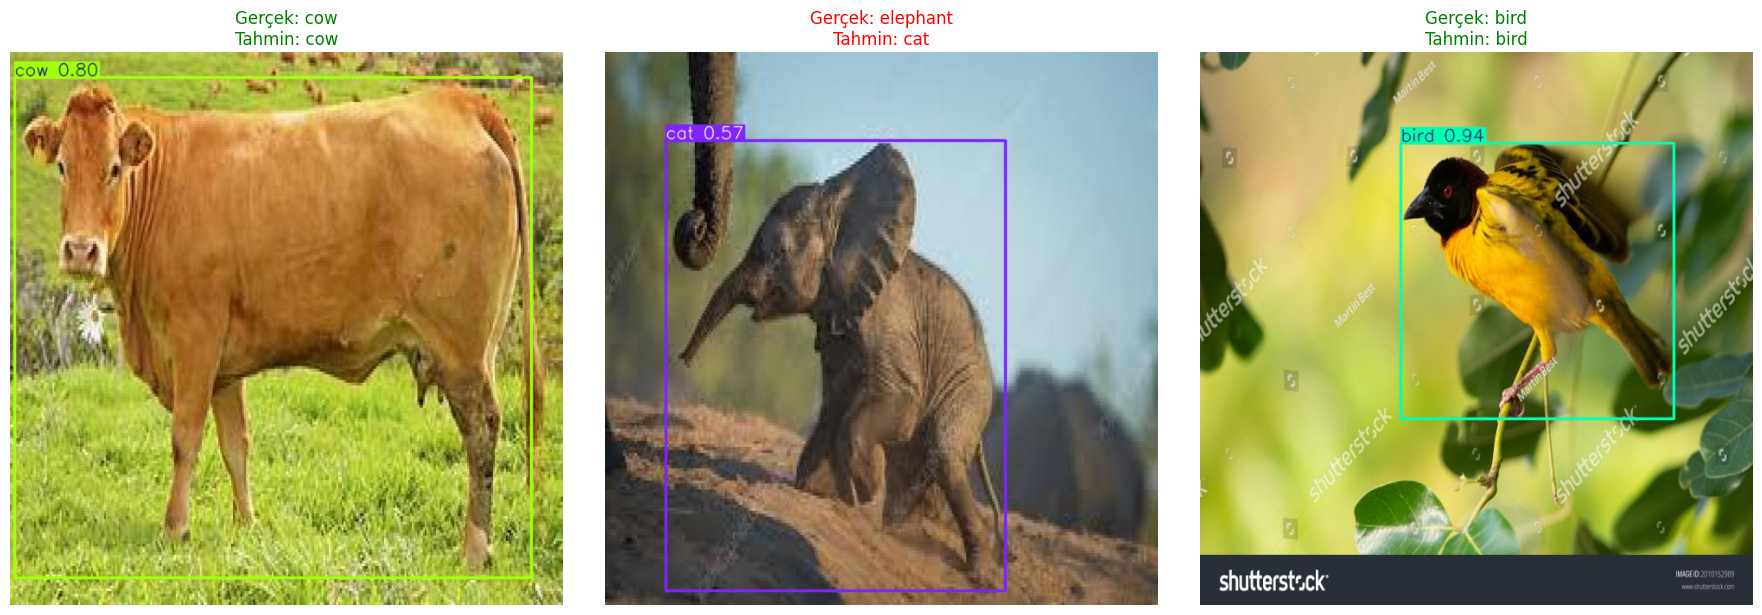

In [38]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

best_model_path = 'runs/detect/train/weights/best.pt'
model = YOLO(best_model_path)

images_to_process = [
    {
        "path": 'ANIMAL Detection.v3i.yolov8/valid/images/OIP-5KXJ70e6l9qwDzE2pSgc9AHaE6_jpeg_jpg.rf.69dca7a6e8b8a3f6db76a29b3ad480b9.jpg',
        "true_label": "cow"
    },
    {
        "path": 'ANIMAL Detection.v3i.yolov8/valid/images/37_jpg.rf.04f6391adadf82f783736e9b5bcb1fd2.jpg',
        "true_label": "elephant"
    },
    {
        "path": 'ANIMAL Detection.v3i.yolov8/valid/images/stock-photo-black-headed-weaver-nesting-close-top-2010152909_jpg.rf.7f029d842d7d80a80c5364b224b6a9a4.jpg',
        "true_label": "bird"
    }
]

fig, axes = plt.subplots(nrows=1, ncols=len(images_to_process), figsize=(18, 6))


for ax, item in zip(axes, images_to_process):
    image_path = item["path"]
    true_label = item["true_label"]

    results = model.predict(image_path, conf=0.5)

    for result in results:
 
        predicted_label = "no_prediction"
        if len(result.names) > 0 and len(result.boxes.cls) > 0:
            predicted_label = result.names[int(result.boxes.cls[0])]

        is_correct = (predicted_label == true_label)
        title_color = "green" if is_correct else "red"

        im_array = result.plot()
        im_rgb = im_array[..., ::-1]
        ax.imshow(im_rgb)
        ax.axis('off')

        ax.set_title(f"Gerçek: {true_label}\nTahmin: {predicted_label}", color=title_color)

plt.tight_layout()
plt.show()
